## Variables ecómicas

Unión de las variables economicas en la variable *df_var*

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.linear_model import LinearRegression 
from statsmodels.tsa.arima.specification import SARIMAXSpecification
from statsmodels.tsa.arima.params import SARIMAXParams
from statsmodels.tsa.seasonal import seasonal_decompose


# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
%store -r df_mex         #Invesion_ES.pynb
%store -r df_desempleo   #edit_Desempleo.pynb
%store -r df_IED         #edit_IED.pynb
%store -r df_IPC         #edit_IPC.pynb
%store -r df_reservas    #edit_reservas.pynb
%store -r df_deuda       #edit_deuda.pynb
%store -r df_interes
%store -r df_balanzapagos 
%store -r df_import
%store -r df_export
%store -r df_PIB_total

no stored variable #Invesion_ES.pynb
no stored variable #edit_Desempleo.pynb
no stored variable #edit_IED.pynb
no stored variable #edit_IPC.pynb
no stored variable #edit_reservas.pynb
no stored variable #edit_deuda.pynb


In [3]:
df_var = pd.concat([df_IPC,df_desempleo,df_mex,df_IED,df_reservas,df_deuda,df_interes, df_balanzapagos, df_import, df_export, df_PIB_total], axis=1)

In [4]:
df_var

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
1993,9.75,3.37,94.32,3903.58,22500.67,117269.60,18.23,-20811.96,60076.30,46147.41,500736.07
1994,6.97,4.44,34.05,8807.63,5170.50,112309.71,19.30,-23809.78,65810.16,48869.98,527813.24
1995,35.00,7.10,16.53,7113.28,12727.92,124500.30,59.43,-1177.13,55574.64,59394.01,360073.91
1996,34.38,5.47,27.26,7275.91,15467.27,124821.36,36.39,-1986.39,72856.57,76041.60,410975.60
1997,20.63,4.24,93.71,11720.02,26356.74,135969.78,22.14,-7001.92,103336.03,100878.72,500413.48
1998,15.93,3.73,71.46,10876.42,27166.55,136569.31,26.36,-13635.34,110046.79,100146.40,526502.13
1999,16.59,2.60,100.38,13837.88,31592.87,166731.61,23.74,-13896.14,145002.98,135381.71,600232.87
2000,9.49,2.65,140.04,19505.44,37751.05,161879.29,16.93,-19898.19,190429.25,176532.02,707906.74
2001,6.37,2.63,70.30,33742.37,50293.24,186407.40,12.80,-19927.19,194236.28,177969.01,756706.30
2002,5.03,3.00,61.56,22910.10,48259.49,149787.48,8.21,-14168.26,164848.06,153033.54,772106.38


In [5]:
%store df_var

Stored 'df_var' (DataFrame)


In [6]:
df_var.index = pd.to_datetime(df_var.index ).year

In [7]:
df_var.isna().sum()

variables
IPC(%anual)                       0
Desempleo (%)                     0
Inversion Es(millones€)           0
IED(millones€)                    0
Total de reservas(millones€)      0
Deuda Externa(millones€)          0
Tasa de interés(%)                0
Saldo Balanza Pagos(millones€)    0
Importaciones(millones€)          0
Exportaciones(millones€)          0
PIB                               0
dtype: int64

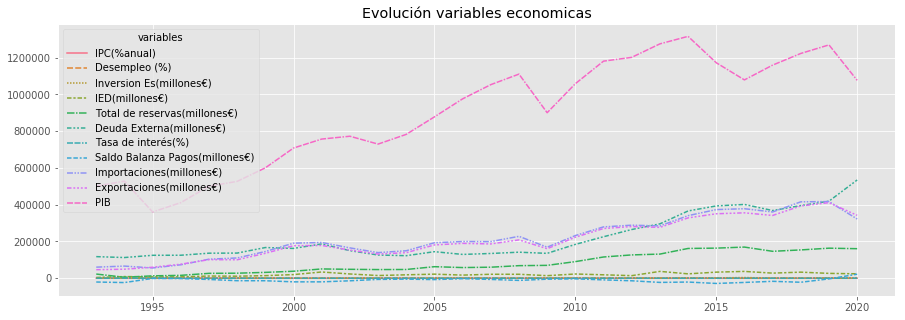

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_var)
plt.title('Evolución variables economicas')
plt.show()

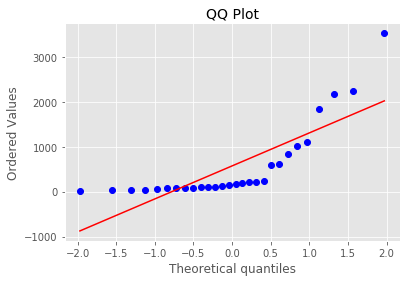

In [9]:
scipy.stats.probplot(df_var['Inversion Es(millones€)'], plot =  plt)
plt.title("QQ Plot", size = 14)

plt.show()

QQ Plot (Quantile - Quantile)

los valores estan alejados de la media. No sigue una ditribución normal.


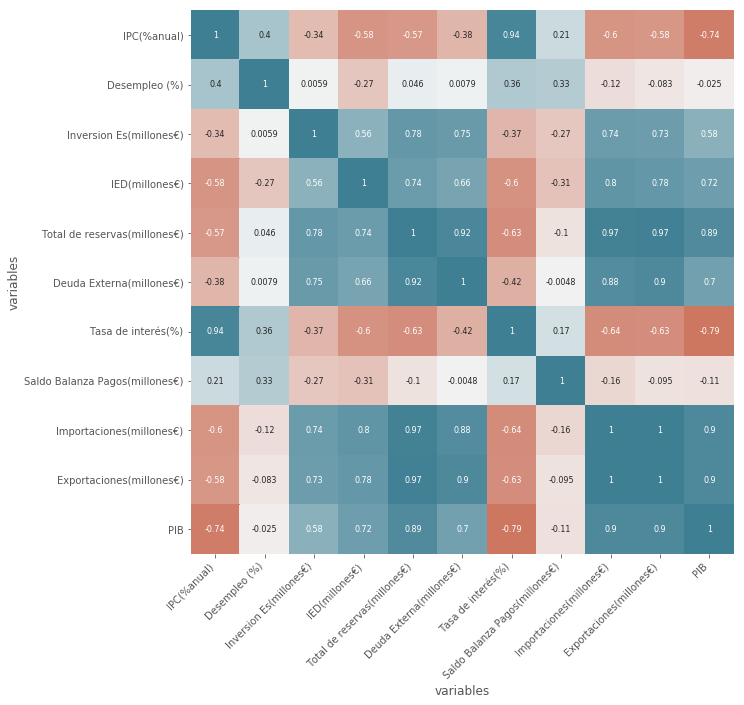

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(df_var.corr(), annot=True,
            cbar      = False,
            annot_kws = {"size": 8},
            vmin      = -1,
            vmax      = 1,
            center    = 0,
            cmap      = sns.diverging_palette(20, 220, n=200),
            square    = True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [11]:
corr = df_var.corr()
corr[['Inversion Es(millones€)']].sort_values(by = 'Inversion Es(millones€)',ascending = False).style.background_gradient()


variables,Inversion Es(millones€)
variables,
Inversion Es(millones€),1
Total de reservas(millones€),0.784723
Deuda Externa(millones€),0.752302
Importaciones(millones€),0.739895
Exportaciones(millones€),0.734195
PIB,0.575082
IED(millones€),0.560493
Desempleo (%),0.00586333
Saldo Balanza Pagos(millones€),-0.265274


Total de reservas, deuda externa, importaciones y exportaciones están altamente relacionadas con Inversión ES.
IED y PIB están ligeramente correlacionadas con Inversion ES

Cuanto más sesgado (-1,1), mayor es el coeficiente de correlación.
Cuando el coeficiente de correlación de Pearson está entre 0,4 y 0,6, significa que hay una correlación moderada entre las variables; cuando el coeficiente de correlación está por encima de 0,6, refleja que hay una fuerte correlación entre las variables.

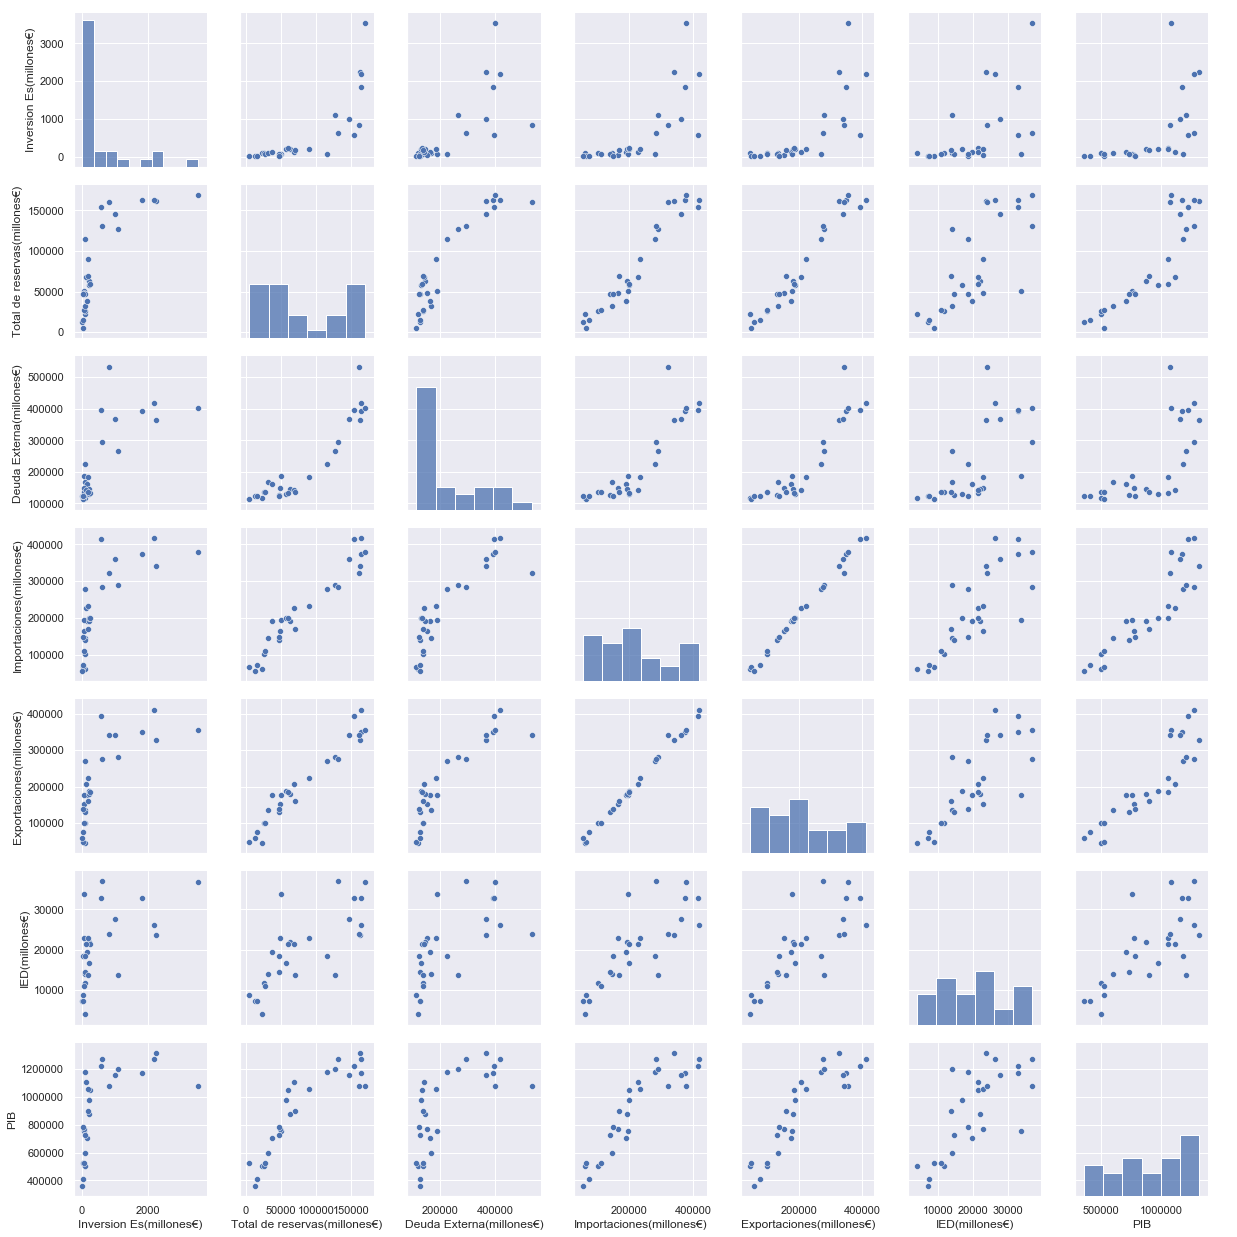

In [12]:
sns.set()
cols = ['Inversion Es(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)', 'Importaciones(millones€)', 'Exportaciones(millones€)', 'IED(millones€)', 'PIB']

sns.pairplot(df_var[cols], size = 2.5)
plt.show();

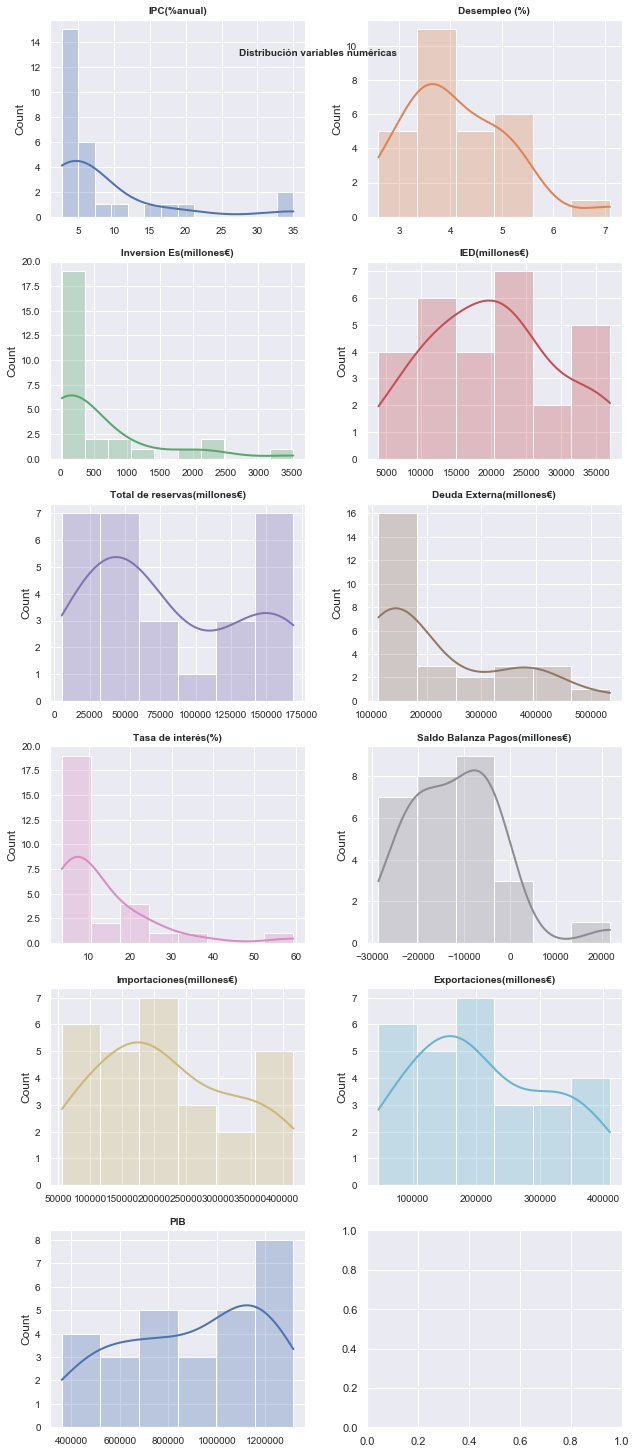

In [13]:
# Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(9, 20))
axes = axes.flat
columnas_numeric = df_var.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_var,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 1)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

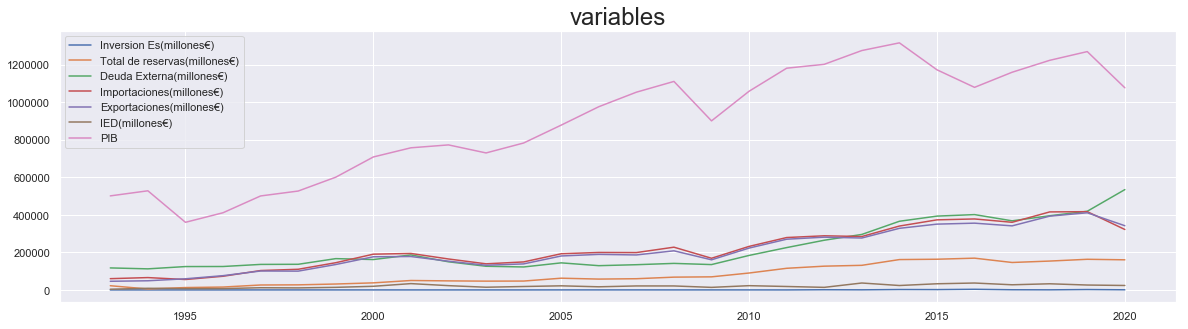

In [14]:
df_var['Inversion Es(millones€)'].plot(figsize = (20,5))
df_var['Total de reservas(millones€)'].plot()
df_var['Deuda Externa(millones€)'].plot()
df_var['Importaciones(millones€)'].plot()
df_var['Exportaciones(millones€)'].plot()
df_var['IED(millones€)'].plot()
df_var['PIB'].plot()

plt.title("variables", size = 24)
plt.legend() 
plt.show()


In [15]:
df_var.dtypes

variables
IPC(%anual)                       float64
Desempleo (%)                     float64
Inversion Es(millones€)           float64
IED(millones€)                    float64
Total de reservas(millones€)      float64
Deuda Externa(millones€)          float64
Tasa de interés(%)                float64
Saldo Balanza Pagos(millones€)    float64
Importaciones(millones€)          float64
Exportaciones(millones€)          float64
PIB                               float64
dtype: object

# Regresión Lineal Múltiple

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html


In [16]:
# División de los datos en train y test
X = df_var[['IPC(%anual)', 'Desempleo (%)', 'IED(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)', 'Tasa de interés(%)', 'Saldo Balanza Pagos(millones€)','Importaciones(millones€)', 'Exportaciones(millones€)','PIB'   ]]
y = df_var['Inversion Es(millones€)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [17]:
# Creación del modelo utilizando matrices como en scikitlearn
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     Inversion Es(millones€)   R-squared:                       0.945
Model:                                 OLS   Adj. R-squared:                  0.891
Method:                      Least Squares   F-statistic:                     17.27
Date:                     Mon, 14 Jun 2021   Prob (F-statistic):           5.14e-05
Time:                             18:59:57   Log-Likelihood:                -143.01
No. Observations:                       21   AIC:                             308.0
Df Residuals:                           10   BIC:                             319.5
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Acorde al p-value obtenido para el coeficiente parcial de regresión de PIB (0.654), esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo el predictor 'PIB'.

In [18]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna periodico del conjunto de train y test
X_train = X_train.drop(columns = 'PIB')
X_test  = X_test.drop(columns = 'PIB')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     Inversion Es(millones€)   R-squared:                       0.944
Model:                                 OLS   Adj. R-squared:                  0.898
Method:                      Least Squares   F-statistic:                     20.64
Date:                     Mon, 14 Jun 2021   Prob (F-statistic):           1.18e-05
Time:                             18:59:59   Log-Likelihood:                -143.23
No. Observations:                       21   AIC:                             306.5
Df Residuals:                           11   BIC:                             316.9
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [19]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,2323.287339,6604.144727
IPC(%anual),-41.488216,327.450964
Desempleo (%),-1902.411830,-844.719337
IED(millones€),-0.015868,0.050765
Total de reservas(millones€),0.104445,0.202330
Deuda Externa(millones€),-0.031153,-0.011702
Tasa de interés(%),-42.142502,156.048151
Saldo Balanza Pagos(millones€),0.049568,0.150066
Importaciones(millones€),-0.002814,0.099423
Exportaciones(millones€),-0.141959,-0.028965


In [20]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

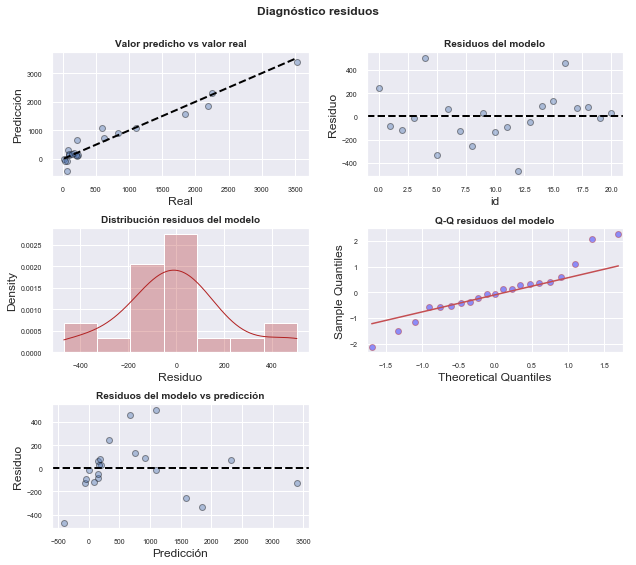

In [21]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [22]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.9504537582397461, 0.34743234515190125)

In [23]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1.9858762377955688, p-value = 0.3704865567804051


In [24]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2003,331.771200,138.706771,26.479657,637.062744,-408.476735,1072.019136
2007,146.695962,121.287002,-120.254929,413.646852,-578.581128,871.973052
2006,89.391527,142.294901,-223.797439,402.580493,-654.148255,832.931309
1995,0.178631,295.810465,-650.895812,651.253074,-937.191098,937.548360


## VIF (Factores de inflación de varianza)


VIF = 1: ausencia total de colinealidad

1 < VIF < 5: la regresión puede verse afectada por cierta colinealidad.

5 < VIF < 10: la regresión puede verse altamente afectada por cierta colinealidad.

El término tolerancia es  1VIF  por lo que los límites recomendables están entre 1 y 0.1.

In [25]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X= df_var[['Total de reservas(millones€)', 'Deuda Externa(millones€)', 'Importaciones(millones€)', 'Exportaciones(millones€)', 
           'PIB', 'IED(millones€)', 'Desempleo (%)', 'Saldo Balanza Pagos(millones€)', 'IPC(%anual)', 'Tasa de interés(%)']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


                          feature          VIF
0    Total de reservas(millones€)   166.986965
1        Deuda Externa(millones€)    65.193629
2        Importaciones(millones€)  6081.304719
3        Exportaciones(millones€)  7184.566721
4                             PIB   171.912503
5                  IED(millones€)    20.210029
6                   Desempleo (%)    74.112527
7  Saldo Balanza Pagos(millones€)    14.612697
8                     IPC(%anual)    21.339007
9              Tasa de interés(%)    32.003500


In [26]:
# the independent variables set
X= df_var[['Deuda Externa(millones€)', 'Desempleo (%)', 'Saldo Balanza Pagos(millones€)', 'IPC(%anual)']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature       VIF
0        Deuda Externa(millones€)  4.768993
1                   Desempleo (%)  8.625141
2  Saldo Balanza Pagos(millones€)  1.970951
3                     IPC(%anual)  2.878144


In [27]:
# División de los datos en train y test
X = df_var[['IPC(%anual)', 'Desempleo (%)','Deuda Externa(millones€)', 'Saldo Balanza Pagos(millones€)']]
y = df_var['Inversion Es(millones€)']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [28]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     7.845
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           0.000897
Time:                        19:00:10   Log-Likelihood:                -169.97
No. Observations:                  22   AIC:                             349.9
Df Residuals:                      17   BIC:                             355.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## PCA


Método de reducción de dimensionalidad para simplificar la complejidad de espacios con multiples dimensiones a la vez que conserva su informacion.
https://www.cienciadedatos.net/documentos/py19-pca-python.html

In [29]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [30]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df_var.mean(axis=0)

----------------------
Media de cada variable
----------------------


variables
IPC(%anual)                            8.372143
Desempleo (%)                          4.098571
Inversion Es(millones€)              573.552500
IED(millones€)                     20117.451429
Total de reservas(millones€)       81098.870000
Deuda Externa(millones€)          221216.617857
Tasa de interés(%)                    12.841071
Saldo Balanza Pagos(millones€)    -11657.978571
Importaciones(millones€)          218815.991429
Exportaciones(millones€)          208597.523214
PIB                               896302.266786
dtype: float64

In [31]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df_var.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


variables
IPC(%anual)                       7.472493e+01
Desempleo (%)                     1.060613e+00
Inversion Es(millones€)           7.579683e+05
IED(millones€)                    8.381517e+07
Total de reservas(millones€)      3.104385e+09
Deuda Externa(millones€)          1.493998e+10
Tasa de interés(%)                1.487850e+02
Saldo Balanza Pagos(millones€)    1.059543e+08
Importaciones(millones€)          1.229329e+10
Exportaciones(millones€)          1.186210e+10
PIB                               8.734818e+10
dtype: float64

In [32]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_var)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [33]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_var.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
)

variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
PC1,0.278995,0.067720,-0.287964,-0.320245,-0.366247,-0.325529,0.293483,0.082082,-0.371766,-0.368892,-0.353311
PC2,0.389314,0.616024,0.198487,-0.106135,0.199986,0.282909,0.342228,0.389034,0.098364,0.140916,0.015981
PC3,-0.344783,0.110530,-0.378800,-0.147452,-0.011359,-0.098025,-0.360691,0.720485,-0.040557,-0.003558,0.207568
PC4,0.215454,-0.699268,0.008570,0.112029,-0.032538,0.308098,0.211994,0.466998,0.091993,0.123131,-0.263334
PC5,0.212123,0.120102,-0.650951,0.647680,-0.038405,-0.063411,0.198344,-0.074438,0.109164,0.105517,0.154677
PC6,-0.136612,0.164807,0.460107,0.655285,-0.142232,-0.163955,-0.101756,0.265108,-0.253543,-0.246509,-0.245520
PC7,-0.300836,0.176455,-0.292901,0.027536,0.115356,0.686111,-0.094912,-0.157951,-0.217754,-0.179596,-0.440600
PC8,0.657561,-0.010565,-0.044546,0.019054,0.150293,0.029733,-0.720466,-0.032593,-0.088174,-0.053260,-0.104582
PC9,0.123930,-0.158988,0.070708,0.037826,-0.014480,0.327679,0.110410,0.003711,-0.480394,-0.375842,0.679051
PC10,0.052537,0.128921,0.076804,-0.021116,-0.875680,0.309537,-0.177851,-0.038760,0.169800,0.197101,0.104080


PC1 = 0.27 IPC + 0.067 Desempleo -0.287 Inversion ES - 0.32 IED -0.366 Total Reservas - 0.32 Deuda Externa +0.29 Tasa de interes + 0.082 Balanza pagos - 0.371 Importaciones -0.36 Exportaciones -0.3533 PIB

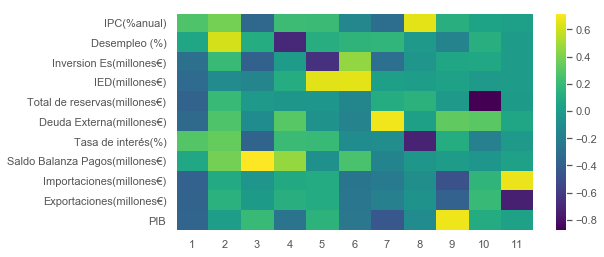

In [34]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_var.columns)), df_var.columns)
plt.xticks(range(len(df_var.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[6.22993373e-01 1.53963605e-01 9.53962064e-02 5.52743966e-02
 3.39880814e-02 1.91977817e-02 1.16754119e-02 5.08864432e-03
 1.86741456e-03 5.28221547e-04 2.68640796e-05]


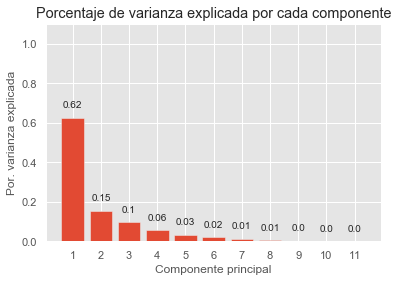

In [35]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_var.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 622% de la varianza observada en los datos y la segunda el 153%. 

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62299337 0.77695698 0.87235318 0.92762758 0.96161566 0.98081344
 0.99248886 0.9975775  0.99944491 0.99997314 1.        ]


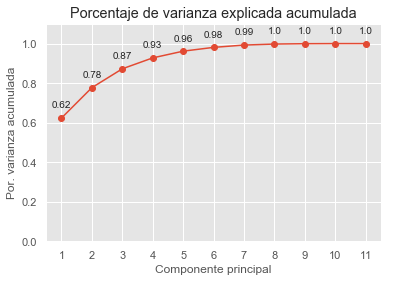

In [36]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df_var.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_var.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las seis primeras componentes se conseguiría explicar el 98% de la varianza observada.

In [37]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df_var)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'],
    index   = df_var.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1993,3.051264,-1.337231,-0.593403,-0.189857,-1.132864,-0.493468,0.511972,-0.024392,0.150582,-0.153244,0.011270
1994,2.946553,-1.034426,-0.638387,-1.078345,-0.598619,-0.027760,0.749191,-0.356670,-0.014276,0.232876,0.013077
1995,5.398451,3.956763,-1.173838,-0.289087,0.705820,0.179565,-0.107842,-0.615320,-0.006600,-0.081031,-0.001853
1996,4.490814,2.297688,-0.669526,0.365990,0.183521,-0.013191,-0.310426,0.708894,0.013994,0.086000,0.008583
1997,2.984204,0.411875,-0.235777,0.434933,-0.146413,0.109429,-0.007361,0.499264,-0.087328,0.050298,-0.008413


In [38]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df_var.columns,
                    index   = df_var.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(df_var.head())

------------------
Valores originales
------------------


variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
1993,9.75,3.37,94.32,3903.58,22500.67,117269.60,18.23,-20811.96,60076.30,46147.41,500736.07
1994,6.97,4.44,34.05,8807.63,5170.50,112309.71,19.30,-23809.78,65810.16,48869.98,527813.24
1995,35.00,7.10,16.53,7113.28,12727.92,124500.30,59.43,-1177.13,55574.64,59394.01,360073.91
1996,34.38,5.47,27.26,7275.91,15467.27,124821.36,36.39,-1986.39,72856.57,76041.60,410975.60
1997,20.63,4.24,93.71,11720.02,26356.74,135969.78,22.14,-7001.92,103336.03,100878.72,500413.48


---------------------
Valores reconstruidos
---------------------


variables,IPC(%anual),Desempleo (%),Inversion Es(millones€),IED(millones€),Total de reservas(millones€),Deuda Externa(millones€),Tasa de interés(%),Saldo Balanza Pagos(millones€),Importaciones(millones€),Exportaciones(millones€),PIB
1993,9.75,3.37,94.32,3903.58,22500.67,117269.60,18.23,-20811.96,60076.30,46147.41,500736.07
1994,6.97,4.44,34.05,8807.63,5170.50,112309.71,19.30,-23809.78,65810.16,48869.98,527813.24
1995,35.00,7.10,16.53,7113.28,12727.92,124500.30,59.43,-1177.13,55574.64,59394.01,360073.91
1996,34.38,5.47,27.26,7275.91,15467.27,124821.36,36.39,-1986.39,72856.57,76041.60,410975.60
1997,20.63,4.24,93.71,11720.02,26356.74,135969.78,22.14,-7001.92,103336.03,100878.72,500413.48


## Principal Components Regression

consiste en ajustar un modelo de regresión lineal por mínimos cuadrados empleando como predictores las componentes generadas a partir de un Principal Component Analysis (PCA). De esta forma, con un número reducido de componentes se puede explicar la mayor parte de la varianza de los datos.

In [39]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [40]:
# División de los datos en train y test
# ==============================================================================
X = df_var.drop(columns='Inversion Es(millones€)')
y = df_var['Inversion Es(millones€)']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Minimos Cuadrados (OLS)
    
    

In [41]:
# Creación y entrenamiento del modelo
# ==============================================================================
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

LinearRegression(normalize=True)

In [42]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_ols = np.sqrt(mean_squared_error(y_true  = y_test, 
                                      y_pred  = predicciones))


print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 1785.3630374179952


Las predicciones del modelo final se alejan en promedio 1.78 unidades del valor real.

# PCR
Para combinar PCA con regresión lineal, se crea un pipeline que combine ambos procesos. Dado que no se puede conocer a priori el número de componentes óptimo, se recurre a validación cruzada.

In [43]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [44]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [45]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = np.sqrt(mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones))


print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 1785.3630374179877


In [46]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

NameError: name 'resultados' is not defined

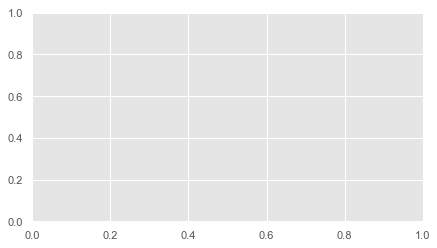

In [47]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(np.float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [48]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


NameError: name 'grid' is not defined

In [49]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [50]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = np.sqrt(mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones
           ))
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 391.9622002561032


Empleando las cinco primeras componentes del PCA como predictores en lugar de las variables originales, se consigue reducir el root mean squared error de 1.78 a 0.39.

## Modelo de Regresión, 5 primeras variables

- IPC
- Desempleo
- Inversion ES
- IED
- Reservas
- Deuda Externa

In [51]:
# División de los datos en train y test
X = df_var[['IPC(%anual)', 'Desempleo (%)','IED(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)']]
y = df_var['Inversion Es(millones€)']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [52]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     7.384
Date:                Mon, 14 Jun 2021   Prob (F-statistic):           0.000923
Time:                        19:00:46   Log-Likelihood:                -168.31
No. Observations:                  22   AIC:                             348.6
Df Residuals:                      16   BIC:                             355.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [53]:
# the independent variables set
X = df_var[['IPC(%anual)', 'Desempleo (%)','IED(millones€)', 'Total de reservas(millones€)', 'Deuda Externa(millones€)']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                        feature        VIF
0                   IPC(%anual)   5.741392
1                 Desempleo (%)  11.917989
2                IED(millones€)   9.570545
3  Total de reservas(millones€)  41.520579
4      Deuda Externa(millones€)  38.683378


# Sarimax

In [55]:
from sinfo import sinfo
sinfo()


The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.0.2
numpy       1.19.2
pandas      0.23.4
patsy       0.5.1
scipy       1.1.0
seaborn     0.11.1
sinfo       0.3.4
sklearn     0.24.2
statsmodels 0.12.2
-----
IPython             7.2.0
jupyter_client      5.2.4
jupyter_core        4.7.0
jupyterlab          0.35.3
notebook            5.7.4
-----
Python 3.7.9 (default, Aug 31 2020, 12:42:55) [GCC 7.3.0]
Linux-4.15.0-143-generic-x86_64-with-debian-buster-sid
2 logical CPU cores, x86_64
-----
Session information updated at 2021-06-14 19:00
